# Uno contra todos (Uno vs el resto)
One-vs-all, One-vs-rest
Vamos a ver una grafica y sobre ella explicar el algoritmo

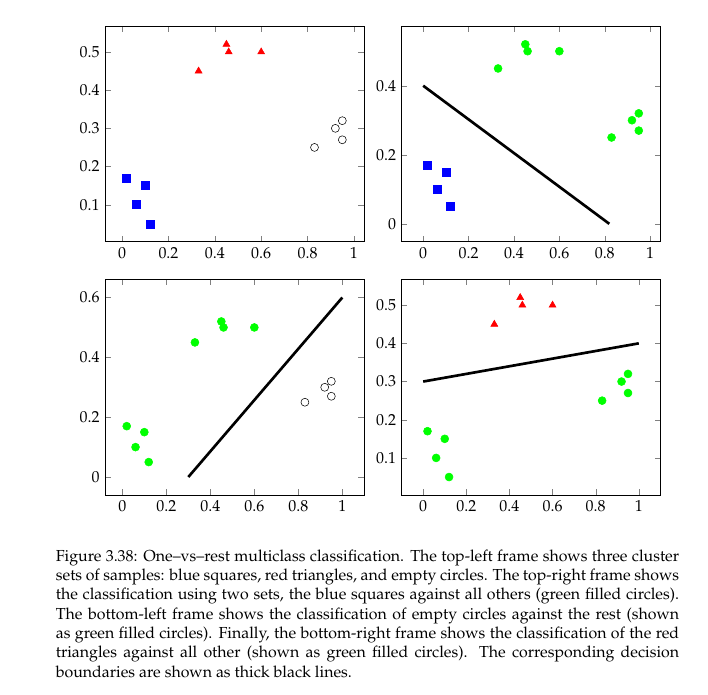

El algoritmo explicado con una grafica

* Si la meta son los cuadrados azules (abajo a la izuierda). El
resto son los triangulos rojos y circuneferencias. Los juntamos en un solo grupo de circulos verdes y separamos esto en dos casos. (ver figura arriba a la izquierda).
Este problema binario ya sambemos como resolverlo. Esto nos da una
hipotesis $h^{(1)}(\theta, x)$.

* Aca la meta son las circurferencias al centro izquierda. Las separamos del resto que son los cuadrados azules y los triangulos
rojos, que los juntamos como circulos verdes (Figura izquierda inferior). Este es un problema binario que nos produce una hiptesis $h^{(1)}(\theta, x)$.

* Por ultimo, nos enfocamos en los triangulos rojos (centro superior). Se separan del resto que son cuadrados azules y cirfunferencias. EStos ultimos se agrupan en circulos verdes.
Se aplica lo que sabemos al algoritmo binario y obtenemos la hipotesis $h^{(3)}(\theta, x)$.


Que hacemos con esto?  Aparece una muestra nueva (cuadrado azul? triangulo rojo? o circunferencia?) entonces definimos una hipotesis para esta nueva muestra como

$$h(\theta, x)= \max_{i=1}^k h^{(i)}(\theta , x) .$$

# Analisis de precision en los resultados.
Hemos visto algoritmos de clasificacion pero tenemos herramientas para evaluar la precision de los mismos.


## Matriz de confusion.
El termino
[confusion](https://stats.stackexchange.com/questions/164910/what-is-the-origin-of-the-term-confusion-matrix) se explica en el blog (azul).

Para explicar esta matriz pensemos por el momento en dos clases (y por facilida).

Miremos la siguiente grafica.


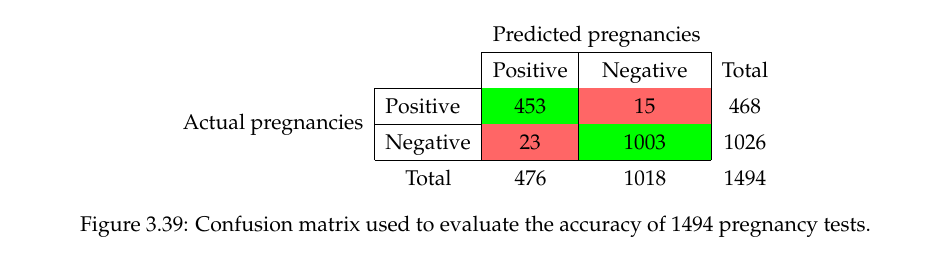

Vamos a ponerle nombre a las entradas de esta matriz de confusion.
Para no confundirnos con la notacion (la prediccion es la segunda
letra en la lista que sigue).

* $\ell_{11}$: TP se conocen compo positivos verdaderos (true positives). Las predicciones son positivas y correctas.
* $\ell_{12}$: FN: Falsos negativos

* $\ell_{21}$: FP: Falso positivo (false positive). Se predijo positivo pero es mentiras.
* $\ell_{22}$: TN: True negative (negativo verdadero).

En la matriz de confusion de arriba. Las verdes son buenas, son la diagonal. Lo que esta en la diagonal es bueno. Si todos los datos estan en la diagonal, la prediccion es perfecta.


Vamos a estudiar varias medidas sobre esta matriz de confusion.

Por ejemplo, los de la diagonal son los buenos. Un error relativo es la suma de los de la diagonal con respecto a todos $m$.
A esta medida la llamamos:


$$\text{accuracy} = \frac{TP + TN}{TP+TN+FP+FN} = \frac{TP+TN}{m} . \tag{1} $$

(accuracy lo traduzco como "exactitud")

El opuesto es la suma de la antidiagonal contra el resto (los "malos") esto seria

$$\text{misclassification rate} = \frac{FN+FP}{m} .$$
Claramente

accuracy = 1 - misclasification rate.
yo traduzco misclasification rate: rata de clasificacion falsa.

vamos a hacer un ejemplo en python y luego explicamos el
significado de las cuatro componentes de la matriz de confusion con ejemplos practicos.



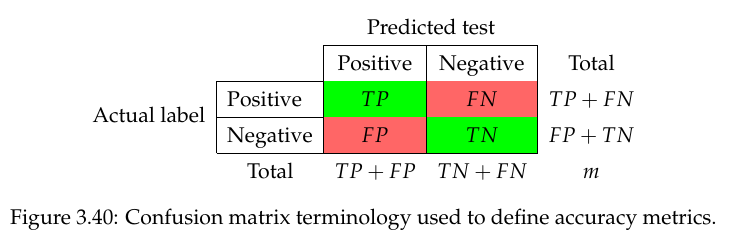

In [ ]:
from sklearn.metrics import confusion_matrix

y_true=[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
y_pred=[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]

tn , fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"tn={tn}, fp={fp}, fn={fn}, tp={tp}")

tn=2, fp=4, fn=3, tp=3


# Entender la importancia de los elementos de la matriz de confusion.

**Ejemplo 1 :** Un instituto investiga un proyecto en diabeticos. Los pacientes que tienen "+" se predicen como diabeticos y los de "-" como no diabeticos. Los dos diagnosticos se deben medir con respecto a la realidad.  Aca las cuatro posibilidades.

* True Positive (TP): En este caso el paciente se predice diabetico y lo es. No es muy buena noticia pero es cierto y toca tomarlo de forma positiva.

* True Negative (TN): Prediccion es que no diabetico, y en realidad es cierto. Paciente feliz :)  .

* False Positive (FP): Se predice que es diabetico y no lo es.
No es muy bueno, pero no es tan grave. Pronto podria hacerse una segunda prueba y ver que todo esta bien.

* False Negative (FN): Se predice que esta aliviado pero no. Entonces el paciente se va feliz a comer azucar y su condicion podria empeorar.  Otro ejemplo, que tal que fuera cancer.
El cancer puede avanzar y hacer metastasis. ..... :(

**Ejemplo 2:**: Un algoritmo de ML esta implementado para detectar "spam email" (mensajes indeseados).

spam es T no spam es N.
* True Positive (TP): El email se predice como spam y es cierto. El email se va directamente al buzon spam.
* True Negative (TN): El email se predice como legitimo y en efecto es legitimo. No se borra y aparece en su "inbox".
* False Positive (FP): Se predice como "spam" pero no es spam.
esto es **grave**. Imaginese un cliente importante proponiendo un negocio que puede cambiar el rumbo de su empresa. O una propuesta de trabajo que le puede cambiar la vida.
* False Negative: Se detecta como legitimo pero no lo es. Te llega basura al inbox. No es un problema grave. Lo marcas como ilegitimo (spam) y el sitema se entrena.




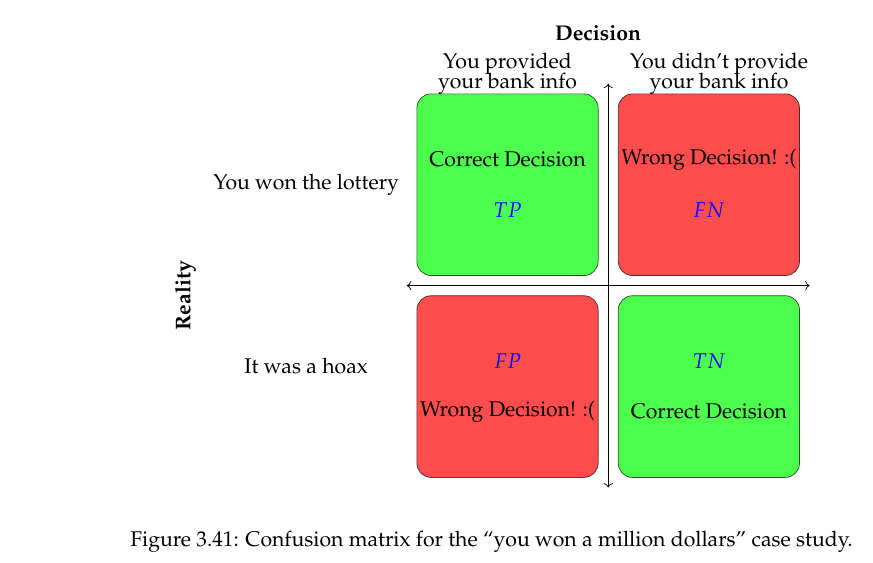

**Ejemplo3 **: Este es un caso intersante por que aca $m=1$.
Esa muestra soy **yo**. Asuma que lo llaman para decirle que se gano la loteria pero que debe dar sus datos de su cuenta para que le consignen.

# Metricas sobre la matriz de confusion.
* Accuracy: Ya la estudiamos.  Ver equacion (1)
Veamos ejemplos.



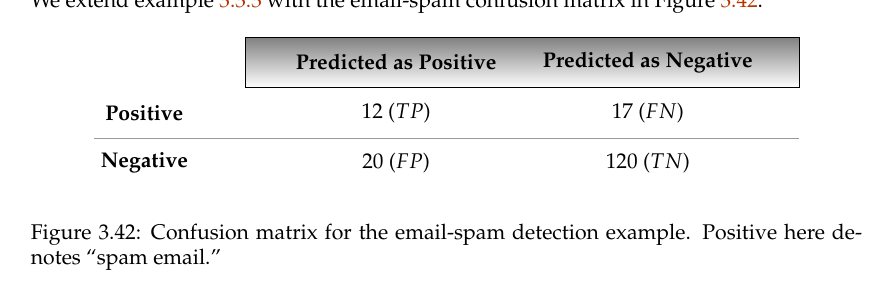

Vamos a calcular el "accuracy" de este esta matria de confusion.

$$\text{accuracy} = \frac{12 + 120}{12 + 120 + 17 + 10} =\frac{132}{159}= 0.781  \quad 78 \% .$$
El ejemplo que sigue muestra por que el "accuracy" no es necesariamente una buena medida.

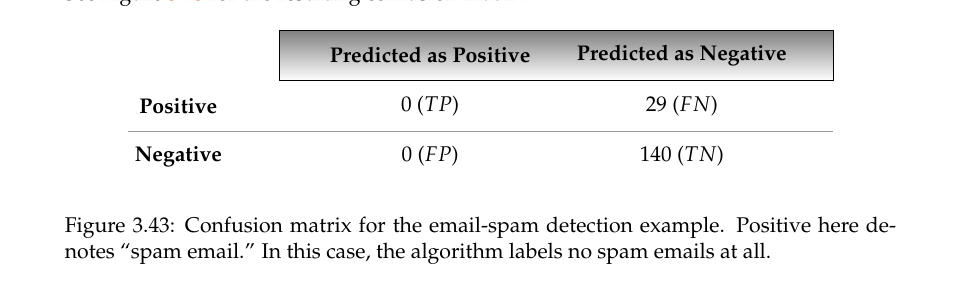

$$ \text{accuracy} = \frac{140 + 0 }{169}= 0.828 \quad , 82.8 \% $$
Esto motiva la inyeccion de nuevas metricas.

* Precision: Esta es la fraccion entre los positivos  verdaderos
y los marcados como positivos


$$\text{precision} = \frac{TP}{TP + FP} .$$



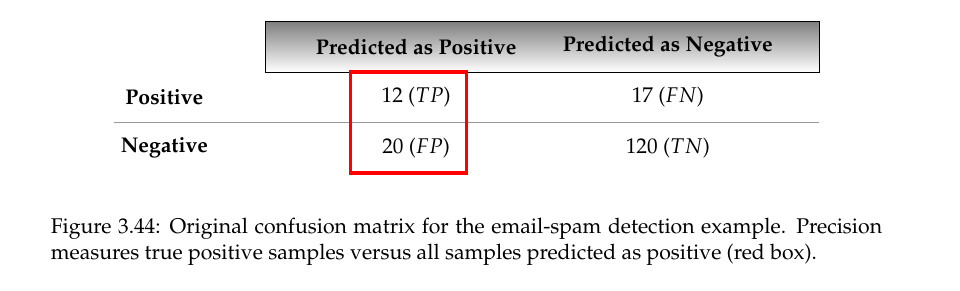

Es decir:

$$\text{precision} = \frac{12}{32} = 0.375   
\quad , \quad 37.5\% .$$

Veamos la precision en  el ejemplo donde hay 0 spam (positives). Todos son buenos

$$\text{precision} = \frac{0}{0+0 + \epsilon} = 0
\quad , \quad 0.\% .$$,
donde $\epsilon \approx 10^{-8}$.

* Recall: La precision nos dice que porcentaje de correctos marcados positivamente sobre todos los marcados como positivos (siendo o no siendo). Ahora pensmos en los positivos verdaderos con respecto a todos los positvos $TP + FN$. Es decir,


$$\text{recall} = \frac{TP}{TP + FN} .$$

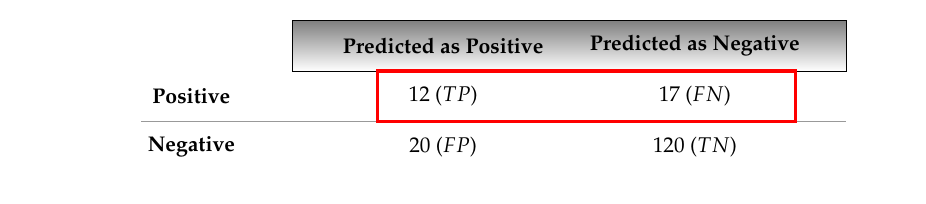

En ejemplo del "spam" email:

$$\text{recall}= \frac{12}{29} = 0.414 \quad, \quad 41.4 \% .$$

Si comparamos precision vs recall vemos que son muy parecidas, salvo que precision en el denonimador suma FP mientras que recall suma FN. La diferencia entre el uno y el otro esta en los falsos.
Recuerde los ejemplos de arriba:

* Para un diagnostico medico es mejor un FP.
* Para un banco (fraude financiero) es mejor un FN.


Por esto de debe elegir muy bien la metrica de acuerdo al caso, por ejemplo precision o recall. Si una muy grande la otra es pequenah. Pregunta? cual de las dos (precision y recall) escoge ustede para un fraude bancario y por que ?



A recall tambien lo llaman TPR: False Positive Rate.
De la misma forma existe una medida llamada FPR: False Positive Rate.

$$ FPR = \frac{FP}{FP + TN} .$$

En la proxima clase vamos a ver una interaccion entre TPR y FPR que es muy importante en la evaluacion de error de clasificacion.


La ultima de la clase de hoy. Se llama F1 score.

$$\text{F1 score} = \left ( \frac{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}{2} \right )^{-1}  =
2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} .$$

El F1 score es un promedio armonico de precision y recall.


## Promedios pitagoricos.

Dados dos reales $a,b$,
* **media**  
$$A=\frac{a+b}{2}  .$$
* **media geometrica**
$$G= \sqrt{a b } . $$
* **media RMS**: Root Mean Square
$$Q = \sqrt{\frac{a^2 + b^2}{2}} .$$
* **media armonica (harmonic)**:
$$ H = \frac{1}{\frac{\frac1a + \frac1b}{2}}.$$

Hay un relacion de desigualdad e igualdad entre las medias.

* $$ H < G < A < Q . \quad a \ne b $$
* $$H=G=A=Q \quad \text{cuando } a = b .$$
* Si cualquiea $a$ o $b$ es igual a cero. Por ejemplo si $b=0$,
$A=a/2$, $Q=\sqrt{2a}$, $G=0$, $H=0$.

* Si $a=b=0$, realmente la armonica no esta definida, este problema no tiene ningun interes. Diriamos que todas las medias pitagoricas son 0.

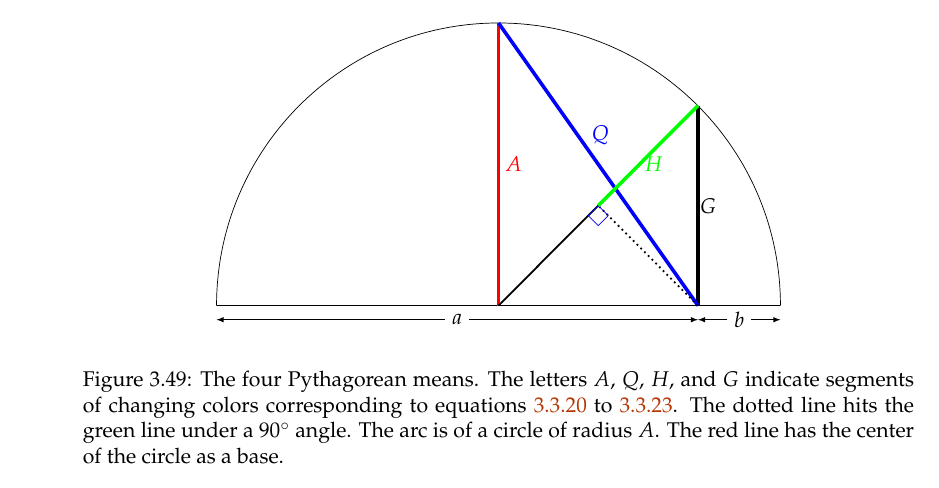

# Proxima Clase: AUC-ROC